In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
df = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/MobilityData.xlsx', sheet_name='Master', header=[0,1])
df.dropna(axis=1, how='all', inplace=True)

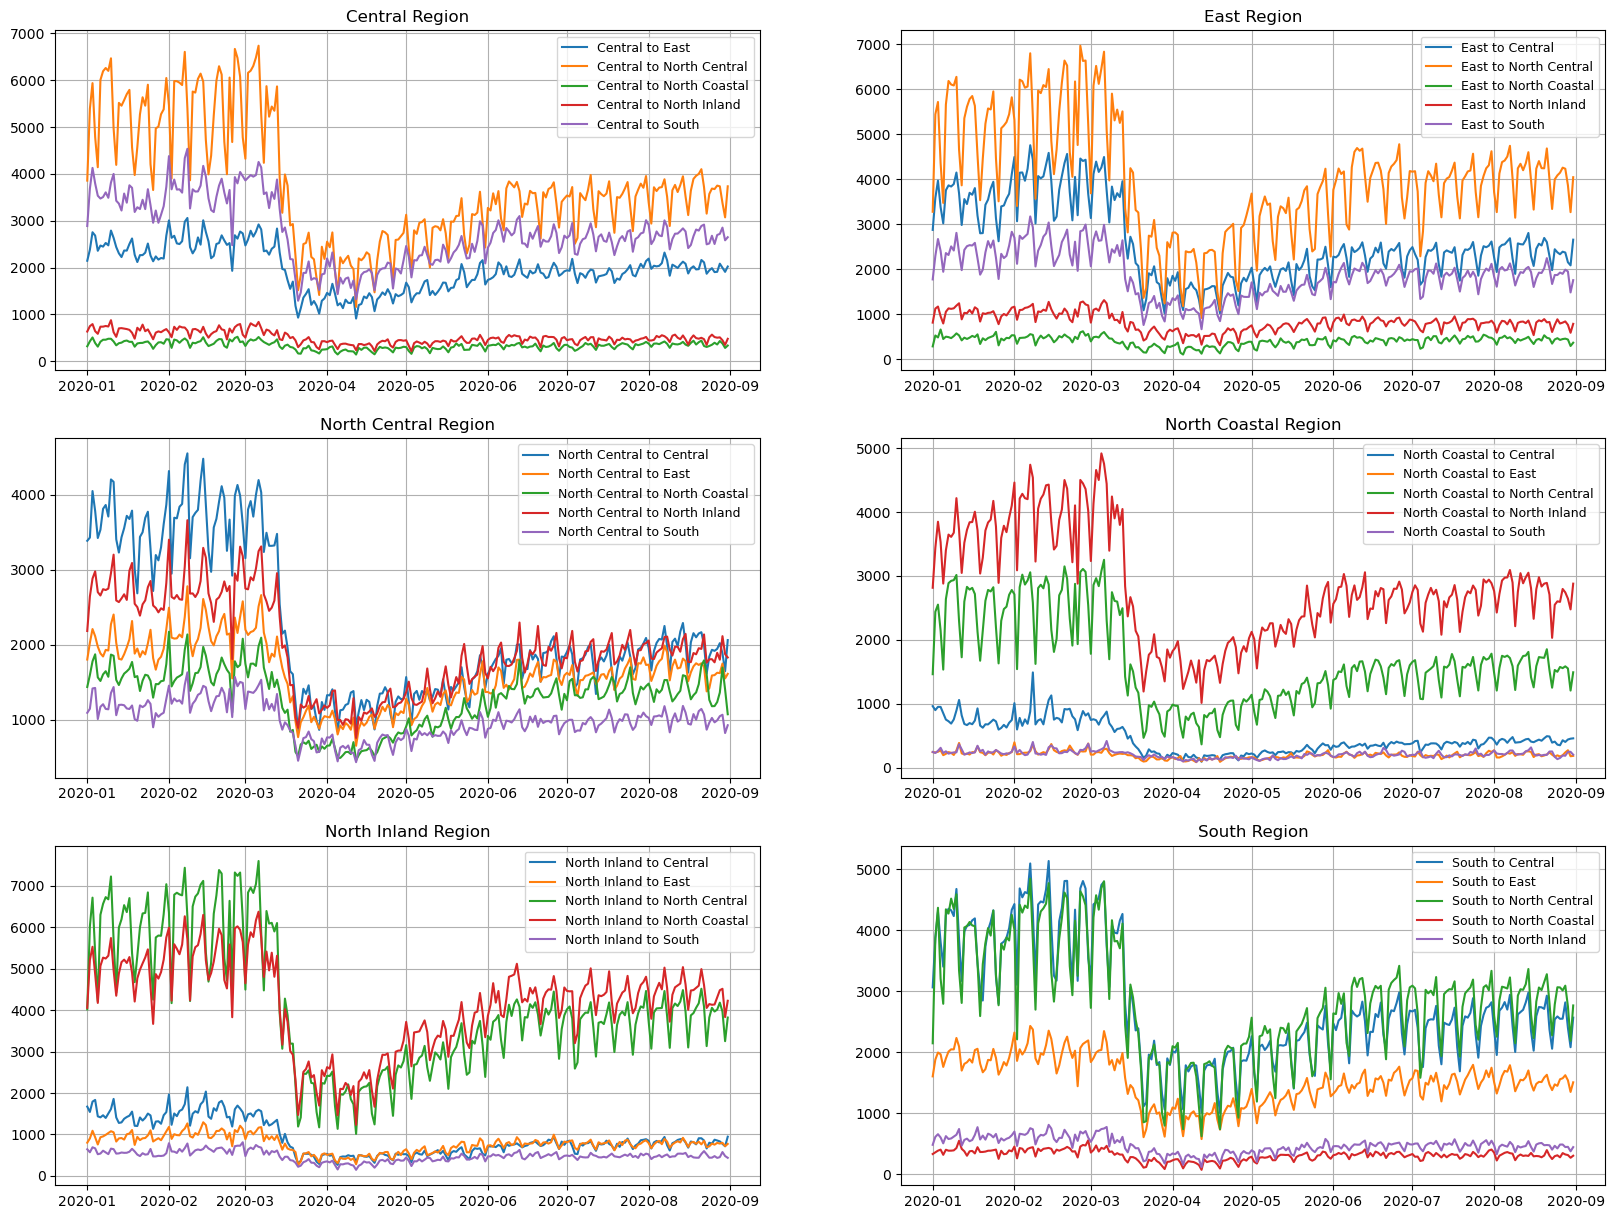

In [83]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 15))
ax1.set_title(f'Central Region')
ax1.plot(df['Date', 'Date'], df['Central', 'East'], label='Central to East')
ax1.plot(df['Date', 'Date'], df['Central', 'North Central'], label='Central to North Central')
ax1.plot(df['Date', 'Date'], df['Central', 'North Coastal'], label='Central to North Coastal')
ax1.plot(df['Date', 'Date'], df['Central', 'North Inland'], label='Central to North Inland')
ax1.plot(df['Date', 'Date'], df['Central', 'South'], label='Central to South')
ax1.legend(loc='upper right', fontsize='9')
ax1.grid()

ax2.set_title(f'East Region')
ax2.plot(df['Date', 'Date'], df['East', 'Central'], label='East to Central')
ax2.plot(df['Date', 'Date'], df['East', 'North Central'], label='East to North Central')
ax2.plot(df['Date', 'Date'], df['East', 'North Coastal'], label='East to North Coastal')
ax2.plot(df['Date', 'Date'], df['East', 'North Inland'], label='East to North Inland')
ax2.plot(df['Date', 'Date'], df['East', 'South'], label='East to South')
ax2.legend(loc='upper right', fontsize='9')
ax2.grid()

ax3.set_title(f'North Central Region')
ax3.plot(df['Date', 'Date'], df['North Central', 'Central'], label='North Central to Central')
ax3.plot(df['Date', 'Date'], df['North Central', 'East'], label='North Central to East')
ax3.plot(df['Date', 'Date'], df['North Central', 'North Coastal'], label='North Central to North Coastal')
ax3.plot(df['Date', 'Date'], df['North Central', 'North Inland'], label='North Central to North Inland')
ax3.plot(df['Date', 'Date'], df['North Central', 'South'], label='North Central to South')
ax3.legend(loc='upper right', fontsize='9')
ax3.grid()

ax4.set_title(f'North Coastal Region')
ax4.plot(df['Date', 'Date'], df['North Coastal', 'Central'], label='North Coastal to Central')
ax4.plot(df['Date', 'Date'], df['North Coastal', 'East'], label='North Coastal to East')
ax4.plot(df['Date', 'Date'], df['North Coastal', 'North Central'], label='North Coastal to North Central')
ax4.plot(df['Date', 'Date'], df['North Coastal', 'North Inland'], label='North Coastal to North Inland')
ax4.plot(df['Date', 'Date'], df['North Coastal', 'South'], label='North Coastal to South')
ax4.legend(loc='upper right', fontsize='9')
ax4.grid()

ax5.set_title(f'North Inland Region')
ax5.plot(df['Date', 'Date'], df['North Inland', 'Central'], label='North Inland to Central')
ax5.plot(df['Date', 'Date'], df['North Inland', 'East'], label='North Inland to East')
ax5.plot(df['Date', 'Date'], df['North Inland', 'North Central'], label='North Inland to North Central')
ax5.plot(df['Date', 'Date'], df['North Inland', 'North Coastal'], label='North Inland to North Coastal')
ax5.plot(df['Date', 'Date'], df['North Inland', 'South'], label='North Inland to South')
ax5.legend(loc='upper right', fontsize='9')
ax5.grid()

ax6.set_title(f'South Region')
ax6.plot(df['Date', 'Date'], df['South', 'Central'], label='South to Central')
ax6.plot(df['Date', 'Date'], df['South', 'East'], label='South to East')
ax6.plot(df['Date', 'Date'], df['South', 'North Central'], label='South to North Central')
ax6.plot(df['Date', 'Date'], df['South', 'North Coastal'], label='South to North Coastal')
ax6.plot(df['Date', 'Date'], df['South', 'North Inland'], label='South to North Inland')
ax6.legend(loc='upper right', fontsize='9')
ax6.grid()

plt.show()

In [77]:
central_tot = 511660
east_tot = 488330
north_central_tot = 646380
north_coastal_tot = 535219
north_inland_tot = 602000
south_tot = 500076

In [78]:
central = pd.concat([df.iloc[:, 0], df.iloc[:, 2:7]], axis=1)
east = pd.concat([df.iloc[:, 0], df.iloc[:, 7:12]], axis=1)
n_central = pd.concat([df.iloc[:, 0], df.iloc[:, 12:17]], axis=1)
n_coastal = pd.concat([df.iloc[:, 0], df.iloc[:, 17:22]], axis=1)
n_inland = pd.concat([df.iloc[:, 0], df.iloc[:, 22:27]], axis=1)
south = pd.concat([df.iloc[:, 0], df.iloc[:, 27:32]], axis=1)

In [89]:
central['Ratio Moved (to East)'] = central['Central', 'East'].apply(lambda x: 100*(x/central_tot))
central['Ratio Moved (to North Central)'] = central['Central', 'North Central'].apply(lambda x: 100*(x/central_tot))
central['Ratio Moved (to North Coastal)'] = central['Central', 'North Coastal'].apply(lambda x: 100*(x/central_tot))
central['Ratio Moved (to North Inland)'] = central['Central', 'North Inland'].apply(lambda x: 100*(x/central_tot))
central['Ratio Moved (to South)'] = central['Central', 'South'].apply(lambda x: 100*(x/central_tot))

east['Ratio Moved (to Central)'] = east['East', 'Central'].apply(lambda x: 100*(x/east_tot))
east['Ratio Moved (to North Central)'] = east['East', 'North Central'].apply(lambda x: 100*(x/east_tot))
east['Ratio Moved (to North Coastal)'] = east['East', 'North Coastal'].apply(lambda x: 100*(x/east_tot))
east['Ratio Moved (to North Inland)'] = east['East', 'North Inland'].apply(lambda x: 100*(x/east_tot))
east['Ratio Moved (to South)'] = east['East', 'South'].apply(lambda x: 100*(x/east_tot))

n_central['Ratio Moved (to Central)'] = n_central['North Central', 'Central'].apply(lambda x: 100*(x/north_central_tot))
n_central['Ratio Moved (to East)'] = n_central['North Central', 'East'].apply(lambda x: 100*(x/north_central_tot))
n_central['Ratio Moved (to North Coastal)'] = n_central['North Central', 'North Coastal'].apply(lambda x: 100*(x/north_central_tot))
n_central['Ratio Moved (to North Inland)'] = n_central['North Central', 'North Inland'].apply(lambda x: 100*(x/north_central_tot))
n_central['Ratio Moved (to South)'] = n_central['North Central', 'South'].apply(lambda x: 100*(x/north_central_tot))

n_coastal['Ratio Moved (to Central)'] = n_coastal['North Coastal', 'Central'].apply(lambda x: 100*(x/north_coastal_tot))
n_coastal['Ratio Moved (to East)'] = n_coastal['North Coastal', 'East'].apply(lambda x: 100*(x/north_coastal_tot))
n_coastal['Ratio Moved (to North Central)'] = n_coastal['North Coastal', 'North Central'].apply(lambda x: 100*(x/north_coastal_tot))
n_coastal['Ratio Moved (to North Inland)'] = n_coastal['North Coastal', 'North Inland'].apply(lambda x: 100*(x/north_coastal_tot))
n_coastal['Ratio Moved (to South)'] = n_coastal['North Coastal', 'South'].apply(lambda x: 100*(x/north_coastal_tot))

n_inland['Ratio Moved (to Central)'] = n_inland['North Inland', 'Central'].apply(lambda x: 100*(x/north_inland_tot))
n_inland['Ratio Moved (to East)'] = n_inland['North Inland', 'East'].apply(lambda x: 100*(x/north_inland_tot))
n_inland['Ratio Moved (to North Central)'] = n_inland['North Inland', 'North Central'].apply(lambda x: 100*(x/north_inland_tot))
n_inland['Ratio Moved (to North Coastal)'] = n_inland['North Inland', 'North Coastal'].apply(lambda x: 100*(x/north_inland_tot))
n_inland['Ratio Moved (to South)'] = n_inland['North Inland', 'South'].apply(lambda x: 100*(x/north_inland_tot))

south['Ratio Moved (to Central)'] = south['South', 'Central'].apply(lambda x: 100*(x/south_tot))
south['Ratio Moved (to East)'] = south['South', 'East'].apply(lambda x: 100*(x/south_tot))
south['Ratio Moved (to North Central)'] = south['South', 'North Central'].apply(lambda x: 100*(x/south_tot))
south['Ratio Moved (to North Coastal)'] = south['South', 'North Coastal'].apply(lambda x: 100*(x/south_tot))
south['Ratio Moved (to North Inland)'] = south['South', 'North Inland'].apply(lambda x: 100*(x/south_tot))

In [95]:
central.max()

Date                            Date             2020-08-31 00:00:00
Central                         East                            3059
                                North Central                   6738
                                North Coastal                    521
                                North Inland                     876
                                South                           4536
Ratio Moved (to East)                                       0.597858
Ratio Moved (to North Central)                               1.31689
Ratio Moved (to North Coastal)                              0.101825
Ratio Moved (to North Inland)                               0.171207
Ratio Moved (to South)                                      0.886526
dtype: object

In [93]:
east.max()

Date                            Date             2020-08-31 00:00:00
East                            Central                         4757
                                North Central                   6968
                                North Coastal                    663
                                North Inland                    1316
                                South                           3176
Ratio Moved (to Central)                                    0.974136
Ratio Moved (to North Central)                              1.426904
Ratio Moved (to North Coastal)                              0.135769
Ratio Moved (to North Inland)                                0.26949
Ratio Moved (to South)                                       0.65038
dtype: object

In [96]:
n_central.max()

Date                            Date             2020-08-31 00:00:00
North Central                   Central                         4554
                                East                            2780
                                North Coastal                   2173
                                North Inland                    3662
                                South                           1631
Ratio Moved (to Central)                                    0.704539
Ratio Moved (to East)                                       0.430088
Ratio Moved (to North Coastal)                               0.33618
Ratio Moved (to North Inland)                                0.56654
Ratio Moved (to South)                                      0.252328
dtype: object

In [97]:
n_coastal.max()

Date                            Date             2020-08-31 00:00:00
North Coastal                   Central                         1489
                                East                             395
                                North Central                   3251
                                North Inland                    4917
                                South                            416
Ratio Moved (to Central)                                    0.278204
Ratio Moved (to East)                                       0.073802
Ratio Moved (to North Central)                              0.607415
Ratio Moved (to North Inland)                               0.918689
Ratio Moved (to South)                                      0.077725
dtype: object

In [98]:
n_inland.max()

Date                            Date             2020-08-31 00:00:00
North Inland                    Central                         2140
                                East                            1295
                                North Central                   7600
                                North Coastal                   6377
                                South                            813
Ratio Moved (to Central)                                    0.355482
Ratio Moved (to East)                                       0.215116
Ratio Moved (to North Central)                              1.262458
Ratio Moved (to North Coastal)                              1.059302
Ratio Moved (to South)                                       0.13505
dtype: object

In [99]:
south.max()

Date                            Date             2020-08-31 00:00:00
South                           Central                         5131
                                East                            2429
                                North Central                   4842
                                North Coastal                    556
                                North Inland                     809
Ratio Moved (to Central)                                    1.026044
Ratio Moved (to East)                                       0.485726
Ratio Moved (to North Central)                              0.968253
Ratio Moved (to North Coastal)                              0.111183
Ratio Moved (to North Inland)                               0.161775
dtype: object